In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from attributes.individual.household_position.household_position import (fit_household_position_joint_age_gender)
from gensynthpop.utils.extractors import synthetic_population_to_contingency

sns.set_theme()

# Compare Household Types
Plots for comparing the household types as generated in the synthetic population compared to reported data. 

Note that the household grouper does not attempt to match these household types, but uses them as the basis for determining what household types are required.
The purpose of the grouper instead was to ensure each agent is placed in a suitable household

In [ ]:
df_synth_pop = pd.read_pickle('../output/synthetic_population/with_households/individuals/synth_pop_DHWZ_v10.pkl')
df_synth_pop

,neighb_code,age_group,gender,age,small_age_group,migration_background,education_attainment_age_group,absolved_education,education_age_group,current_education,license_age,car_license,motorcycle_license,moped_license,household_position,household_id
agent_id,,,,,,,,,,,,,,,,
SA000000,BU05181785,25-45,female,28,25-30,Dutch,25-35,"311 Hbo-, wo-bachelor",28,not_enrolled,25-30,yes,yes,yes,married_with_no_children,SSH000002
SA000001,BU05181785,25-45,female,27,25-30,Dutch,25-35,"121 Vmbo-b/k, mbo1",27,not_enrolled,25-30,yes,no,yes,married_with_no_children,SSH000001
SA000002,BU05181785,25-45,female,26,25-30,NonWestern,25-35,212 Mbo4,26,not_enrolled,25-30,yes,no,yes,married_with_no_children,SSH003365
SA000003,BU05181785,25-45,male,44,40-45,Dutch,35-45,"311 Hbo-, wo-bachelor",40-45,not_enrolled,40-50,yes,yes,yes,single,SSH021632
SA000004,BU05181785,25-45,male,43,40-45,Dutch,35-45,"321 Hbo-, wo-master, doctor",40-45,not_enrolled,40-50,yes,no,yes,married_with_no_children,SSH000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SA084875,BU05183639,65+,male,65,65-70,NonWestern,65-75,"213 Havo, vwo",65-70,not_enrolled,65-70,no,no,no,married_no_children,SSH019409
SA084876,BU05183639,65+,male,65,65-70,NonWestern,65-75,"213 Havo, vwo",65-70,not_enrolled,65-70,no,no,no,single,SSH042348
SA084877,BU05183639,65+,male,65,65-70,NonWestern,65-75,"213 Havo, vwo",65-70,not_enrolled,65-70,no,no,no,married_with_2_children,SSH006978


In [ ]:
df_counts_observed = synthetic_population_to_contingency(df_synth_pop, ["household_position"])

In [ ]:
expected_households = fit_household_position_joint_age_gender(df_synth_pop)

ipfn converged: convergence_rate not updating or below rate_tolerance
Fitted relationship_status X gender X age group fits margins of gender (p = 0.9994128380487441, Z² = 0.001174668796681124)
Fitted relationship_status X gender X age group fits margins of small_age_group (p = 1.0, Z² = 0.005014712738665179)
Fitted relationship_status X gender X age group fits margins of gender X small_age_group (p = 1.0, Z² = 0.027958868073845344)
Fitted relationship_status X gender X age group fits margins of household_type (p = 0.9999999118428862, Z² = 4.789570068711724e-05)


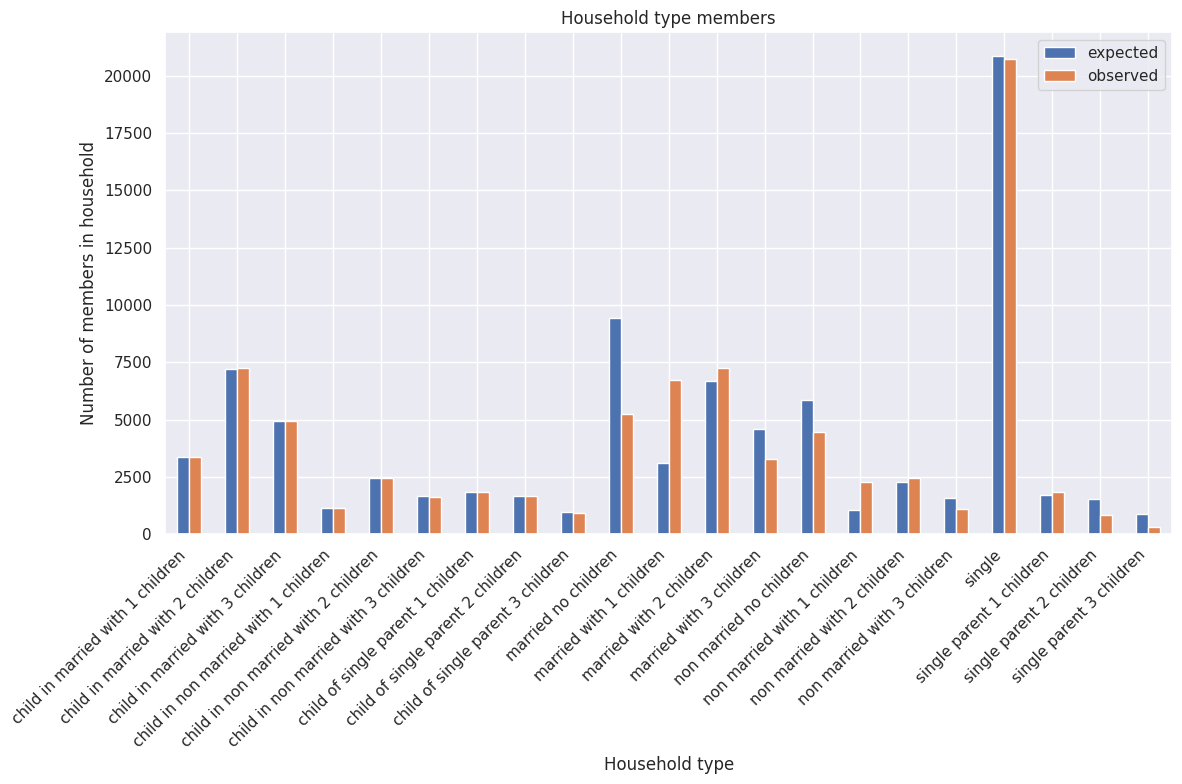

In [ ]:
ax = expected_households.groupby('household_position')[['count']].sum().merge(
        df_counts_observed, on='household_position'
).rename(
        columns=dict(count_x='expected', count_y='observed')
).plot(kind='bar', figsize=(12, 8), rot=45)
plt.ylabel("Number of members in household")
plt.xlabel('Household type')
ax.set_xticklabels([x.get_text().replace('_', ' ') for x in ax.get_xticklabels()], rotation=45, ha='right')
plt.title("Household type members");
plt.tight_layout()
plt.savefig('../doc/figures/households/household-type-members.png');